# TopoMap but in Julia... oh, and make it 3D!

In [1]:
using TopoMap
import WebIO
using PlotlyJS, Distributions, MLDatasets, Random, Interact, DataFrames, CSV

WebIO._IJuliaInit()

┌ Info: Precompiling TopoMap [756fef5d-c602-4a90-a6b1-879a434a1820]
└ @ Base loading.jl:1423


In [2]:
# Test WebIO
# Note: WebIO needs to be installed via pip to global and jupyter labextenstions need to be installed
node(:p, "Hello")

(p
  "Hello")

In [3]:
function normalize(X::Matrix{Float64})
    for i = 1:size(X, 2)
        max_x = maximum(X[:,i])
        min_x = minimum(X[:,i])
        X[:,i] = (X[:,i] .- min_x) ./ (max_x - min_x)
    end
    return X
end

normalize (generic function with 1 method)

## Simple shapes

In [ ]:
data = rand(Normal(0), (266,3))
labels = repeat([1], 266)
data = vcat(data, rand(Normal(5), (267,3)))
append!(labels, repeat([2],267))
data = vcat(data, rand(Normal(10), (267,3)))
append!(labels, repeat([3],267));

data = normalize(data)

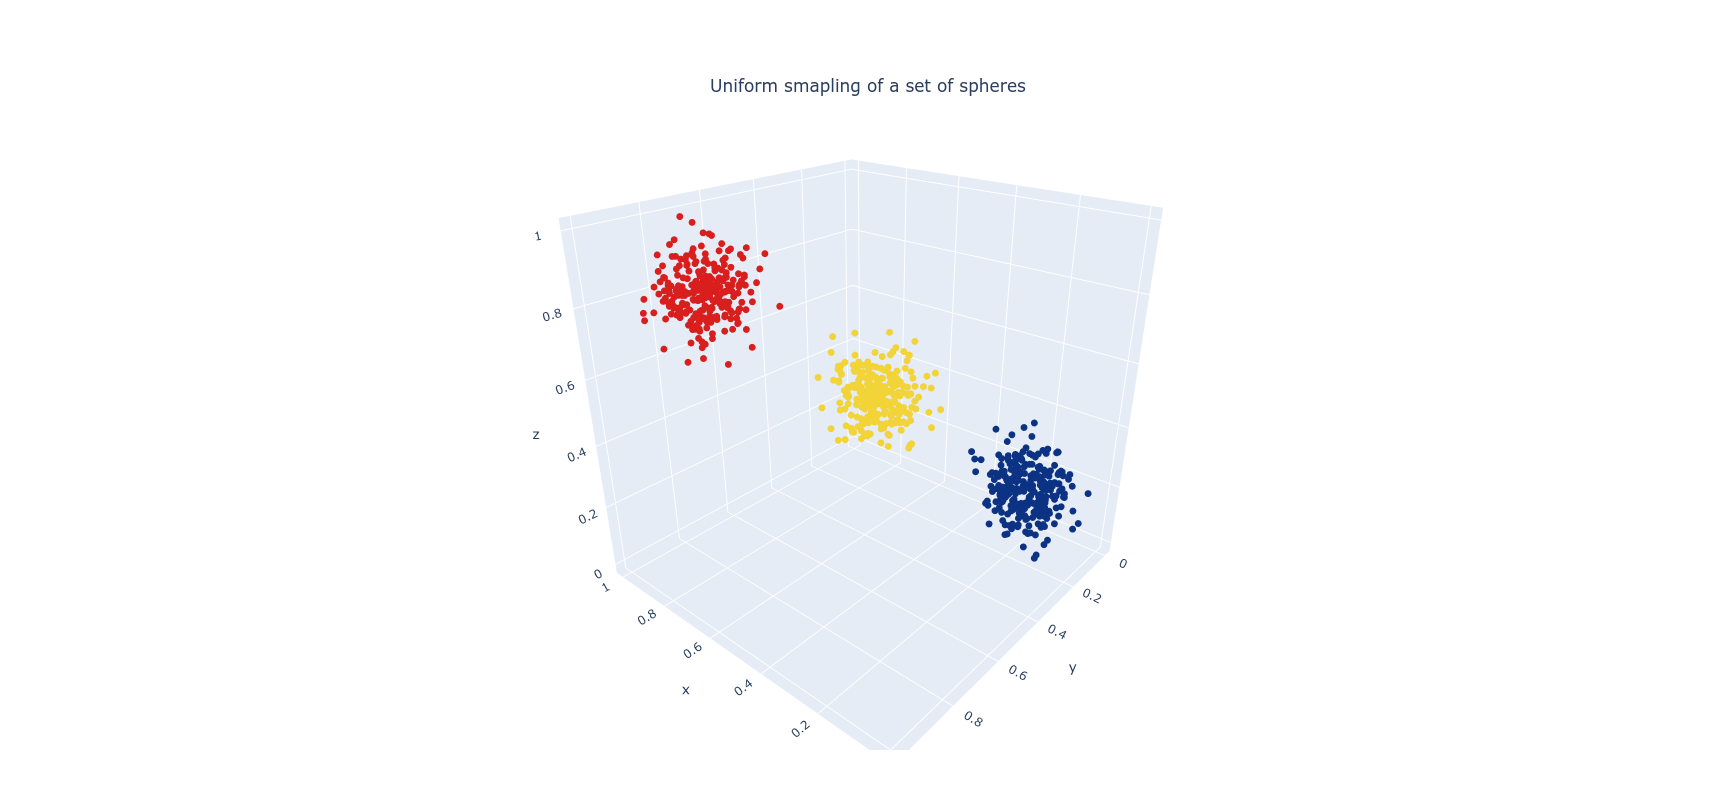

In [5]:
trace = scatter3d(;x=data[:,1],y=data[:,2], z=data[:,3], mode="markers",
                        marker=attr(color=labels, colorscale="Portland",size=4, symbol="circle"))
plot(trace, Layout(width=800, height=800,title=attr(
        text= "Uniform smapling of a set of spheres",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")))

Computing EMST...
--> ngroups: 800
--> ngroups: 227
--> ngroups: 44
--> ngroups: 8
--> ngroups: 3
Placing points...
  4.015054 seconds (52.06 M allocations: 2.508 GiB, 11.69% gc time, 5.41% compilation time)


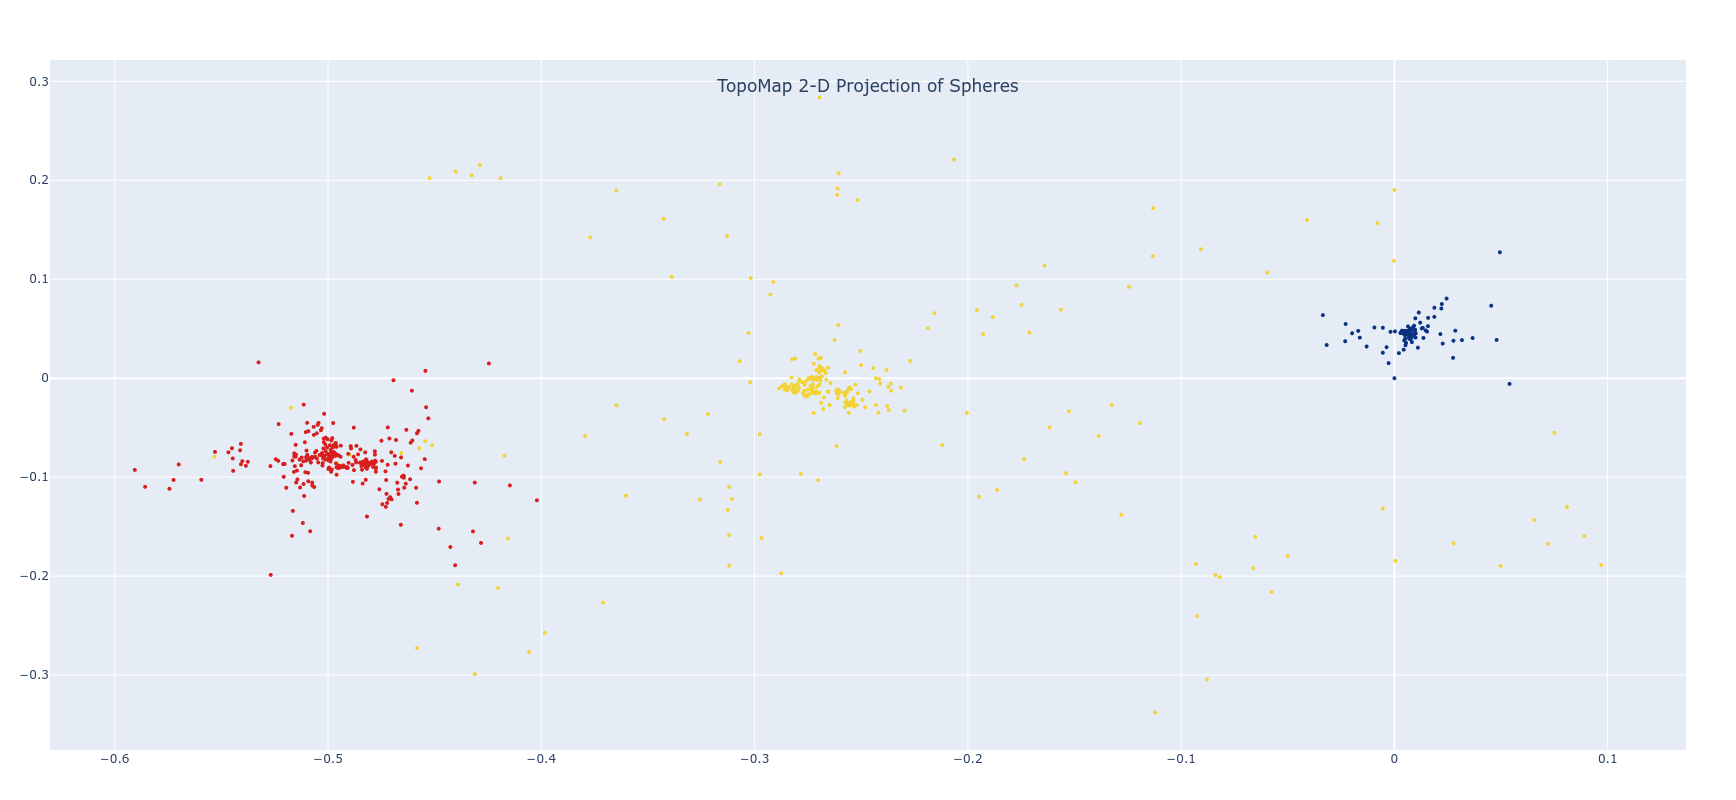

In [6]:
data = copy(data')
@time tm = TopoMap.project(data; dimensions=2);
trace = scatter(;x=tm[:,1],y=tm[:,2], mode="markers",
                        marker=attr(color=labels, colorscale="Portland",size=4, symbol="circle"))
plot(trace, Layout(width=800, height=800,title=attr(
        text= "TopoMap 2-D Projection of Spheres",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")))

Computing EMST...
--> ngroups: 800
--> ngroups: 227
--> ngroups: 44
--> ngroups: 8
--> ngroups: 3
Placing points...
Estimating density...
  4.422511 seconds (52.06 M allocations: 2.513 GiB, 9.83% gc time, 15.13% compilation time)


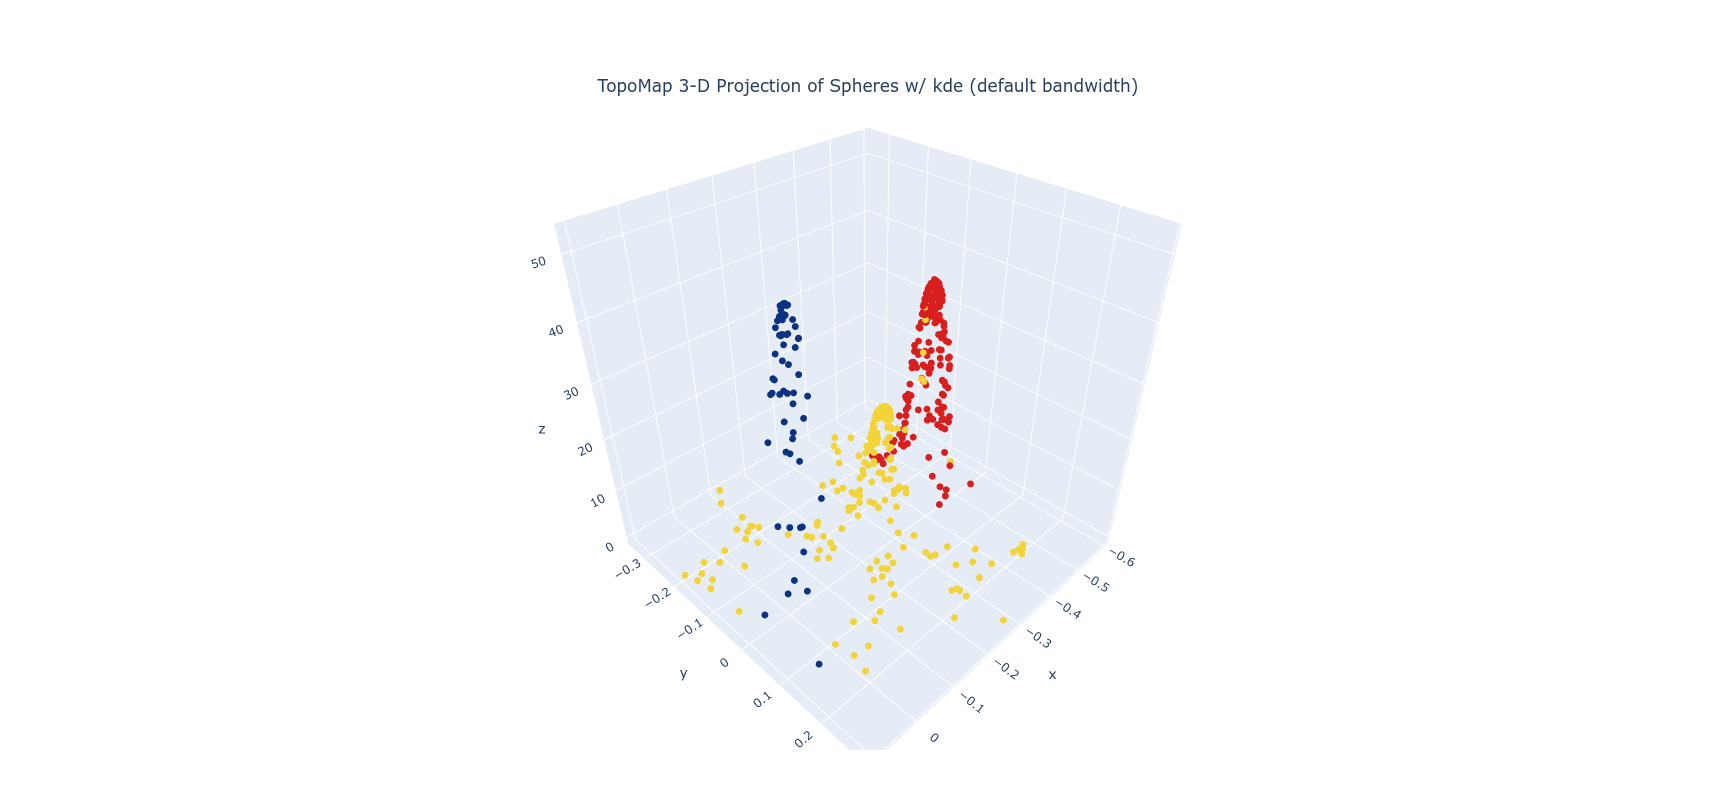

In [7]:
@time tm= TopoMap.project(data; dimensions=3, kernel_estimator="normal");
trace = scatter3d(;x=tm[:,1],y=tm[:,2], z=tm[:,3], mode="markers",
                        marker=attr(color=labels, colorscale="Portland",size=4, symbol="circle"))
plot(trace, Layout(width=800, height=800,title=attr(
        text= "TopoMap 3-D Projection of Spheres w/ kde (default bandwidth)",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")))

Computing EMST...
--> ngroups: 800
--> ngroups: 227
--> ngroups: 44
--> ngroups: 8
--> ngroups: 3
Placing points...
Estimating density...
  3.727016 seconds (51.62 M allocations: 2.491 GiB, 11.77% gc time, 1.10% compilation time)


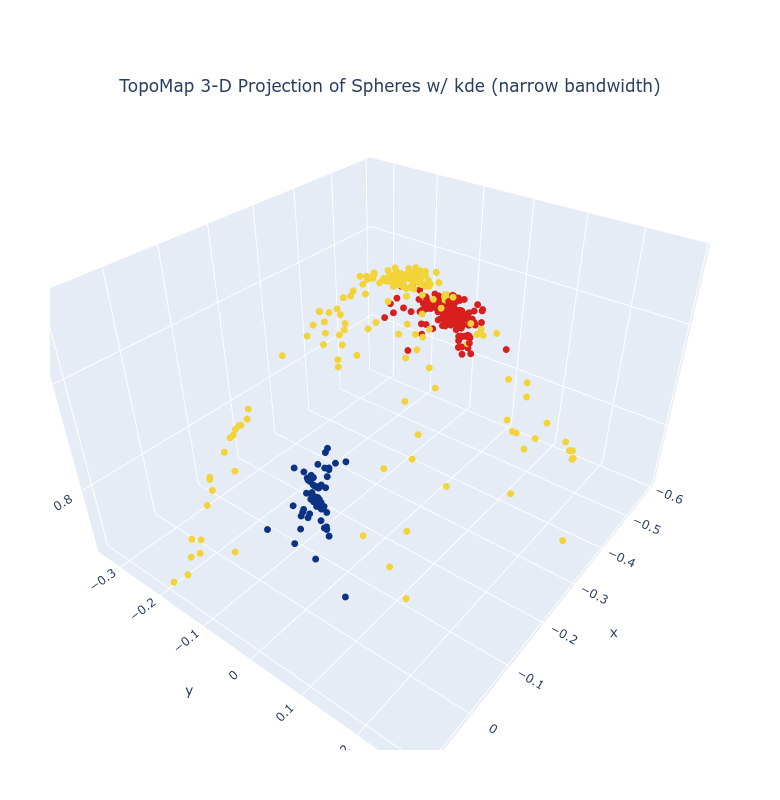

In [8]:
@time tm= TopoMap.project(data; dimensions=3, kernel_estimator="normal", bandwidth=(0.337,0.337));
trace = scatter3d(;x=tm[:,1],y=tm[:,2], z=tm[:,3], mode="markers",
                        marker=attr(color=labels, colorscale="Portland",size=4, symbol="circle"))
plot(trace, Layout(width=800, height=800,title=attr(
        text= "TopoMap 3-D Projection of Spheres w/ kde (narrow bandwidth)",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")))

In [ ]:
@time tm= TopoMap.project(data; dimensions=3, kernel_estimator="normal", bandwidth=(2.,2.));
trace = scatter3d(;x=tm[:,1],y=tm[:,2], z=tm[:,3], mode="markers",
                        marker=attr(color=labels, colorscale="Portland",size=4, symbol="circle"))
plot(trace, Layout(width=800, height=800,title=attr(
        text= "TopoMap 3-D Projection of Spheres w/ kde (wide bandwidth)",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")))

## Toy datasets: Iris

In [10]:
iris_features = Iris.features();
iris_labels = Iris.labels();
species_dict = Dict([("Iris-setosa",1),
                        ("Iris-versicolor", 2),
                        ("Iris-virginica",3)])
color_map = map(x -> species_dict[x], iris_labels);
iris_features = copy(normalize(copy(iris_features'))')

4×150 Matrix{Float64}:
 0.222222   0.166667   0.111111   0.0833333  …  0.611111  0.527778  0.444444
 0.625      0.416667   0.5        0.458333      0.416667  0.583333  0.416667
 0.0677966  0.0677966  0.0508475  0.0847458     0.711864  0.745763  0.694915
 0.0416667  0.0416667  0.0416667  0.0416667     0.791667  0.916667  0.708333

Computing EMST...
--> ngroups: 150
--> ngroups: 40
--> ngroups: 9
--> ngroups: 3
Placing points...
  0.176636 seconds (1.84 M allocations: 115.895 MiB, 16.82% gc time)


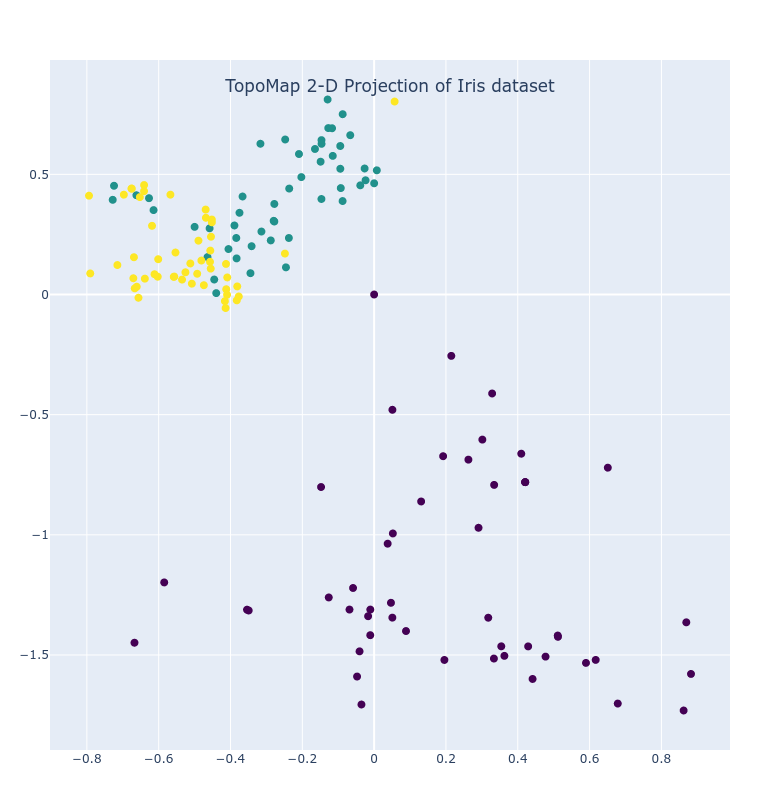

In [11]:
@time tm = TopoMap.project(iris_features; dimensions=2);
trace = scatter(;x=tm[:,1],y=tm[:,2], mode="markers",
                        marker=attr(color=color_map, colorscale="Viridis",size=8, symbol="circle"))
plot(trace, Layout(showgrid=false,width=800, height=800,title=attr(
        text= "TopoMap 2-D Projection of Iris dataset",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")))

Computing EMST...
--> ngroups: 150
--> ngroups: 40
--> ngroups: 9
--> ngroups: 3
Placing points...
Estimating density...
  0.242826 seconds (1.92 M allocations: 123.095 MiB, 11.05% gc time, 23.88% compilation time)


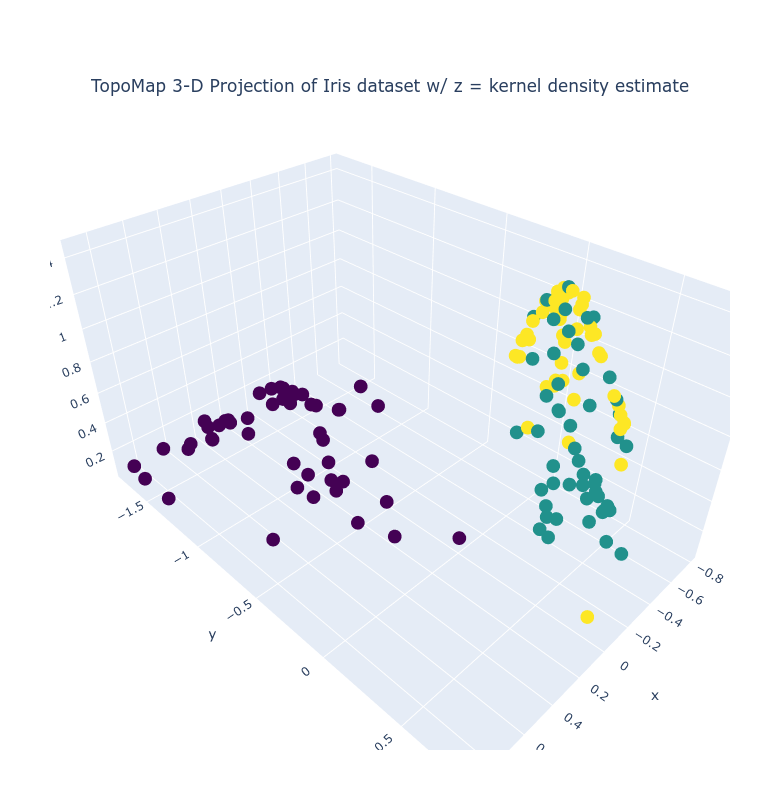

In [12]:
@time tm = TopoMap.project(iris_features; dimensions=3, kernel_estimator="normal");
trace = scatter3d(;x=tm[:,1],y=tm[:,2], z=tm[:,3], mode="markers",group = iris_labels,
                        marker=attr(color=color_map, colorscale="Viridis", size=8, symbol="circle"))
plot(trace,Layout(width=800, height=800,title=attr(
        text= "TopoMap 3-D Projection of Iris dataset w/ z = kernel density estimate",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")))

## Toy datasets: Boston housing dataset

In [13]:
bh_features = BostonHousing.features();
bh_feature_names = BostonHousing.feature_names();
bh_targets = BostonHousing.targets();

bh_features = copy(normalize(copy(bh_features'))');
summary(bh_features)

"13×506 Matrix{Float64}"

Computing EMST...
--> ngroups: 506
--> ngroups: 127
--> ngroups: 34
--> ngroups: 7
--> ngroups: 2
Placing points...
  4.039161 seconds (39.79 M allocations: 3.085 GiB, 11.23% gc time)


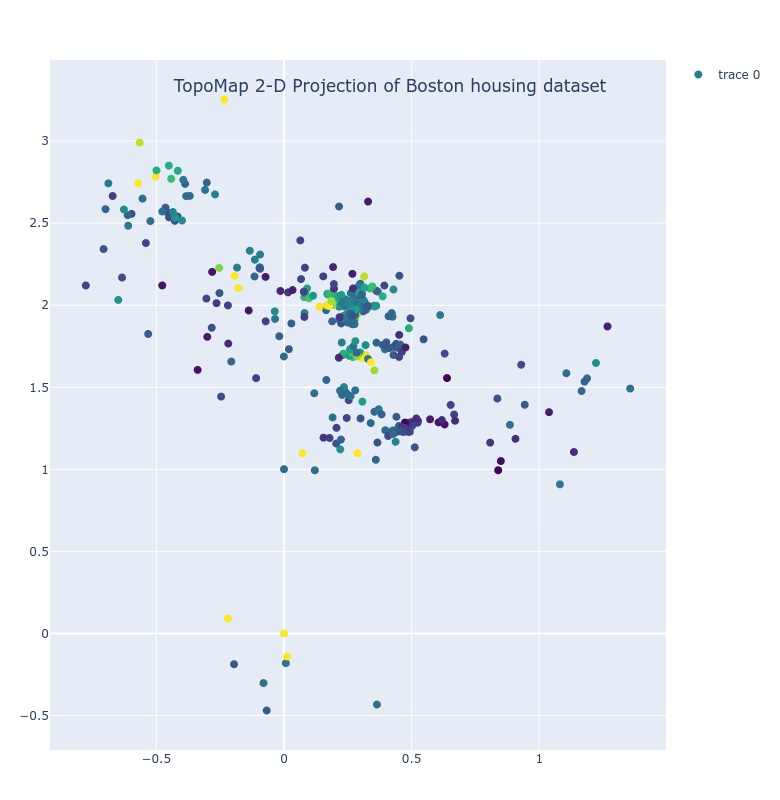

In [14]:
@time tm = TopoMap.project(bh_features; dimensions=2);
tm_df = DataFrame(tm, :auto)
tm_df[!, :targets] = vec(bh_targets)
trace = scatter(tm_df;x=:x1,y=:x2, text=:targets, label=:targets, mode="markers",
                        marker=attr(color=:targets,colorscale="Viridis",size=8, symbol="circle"))
plot(trace,Layout(showlegend=true,width=800, height=800,title=attr(
        text= "TopoMap 2-D Projection of Boston housing dataset",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")))

Computing EMST...
--> ngroups: 506
--> ngroups: 127
--> ngroups: 34
--> ngroups: 7
--> ngroups: 2
Placing points...
Estimating density...
  4.117466 seconds (39.87 M allocations: 3.094 GiB, 10.76% gc time, 1.37% compilation time)


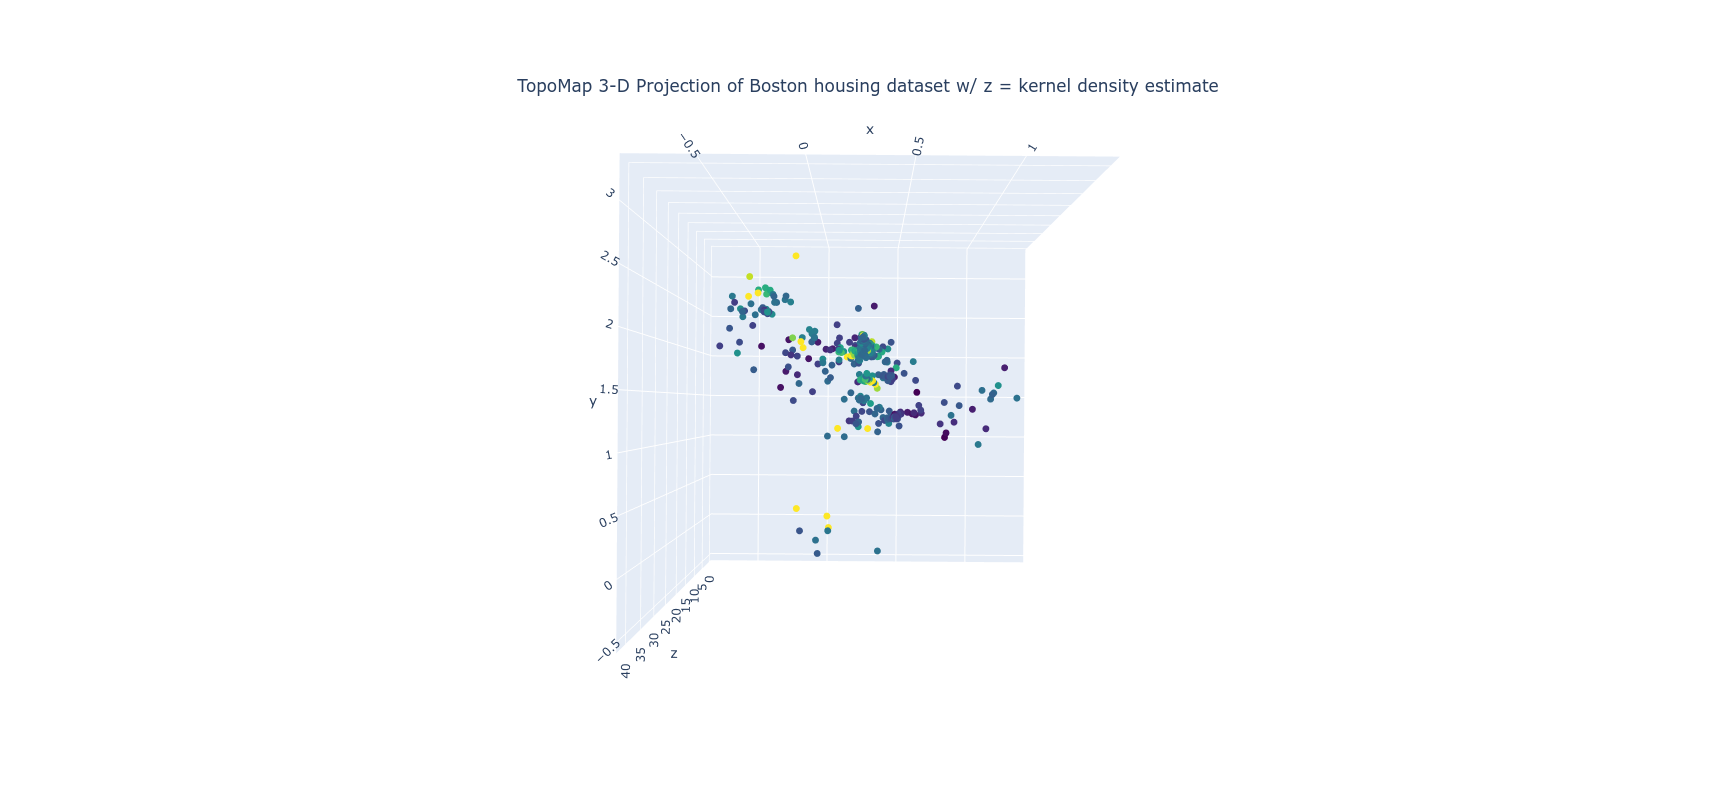

In [15]:
@time tm = TopoMap.project(bh_features; dimensions=3, kernel_estimator="normal");
tm_df = DataFrame(tm, :auto)
tm_df[!, :targets] = vec(bh_targets)
trace = scatter3d(tm_df;x=:x1,y=:x2,z=:x3, text=:targets, label=:targets, mode="markers",
                        marker=attr(color=:targets, colorscale="Viridis",size=4, symbol="circle"))
plot(trace,Layout(width=800, height=800,title=attr(
        text= "TopoMap 3-D Projection of Boston housing dataset w/ z = kernel density estimate",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")))

## Using normalized EMST weights
manymany

$Z$ values are based on the weights computed for the edges of the EMST. Specifically, the $z_i$ is the normalized mean of its connecting edges s.t. 

$$z_i = \frac{w_{max} - mean(w_{i},w_{i+1})}{w_{max}}$$

where $w_{max}$ is the maximum weight.

Computing EMST...
--> ngroups: 506
--> ngroups: 127
--> ngroups: 34
--> ngroups: 7
--> ngroups: 2
Placing points...
  4.086041 seconds (39.79 M allocations: 3.085 GiB, 11.04% gc time)


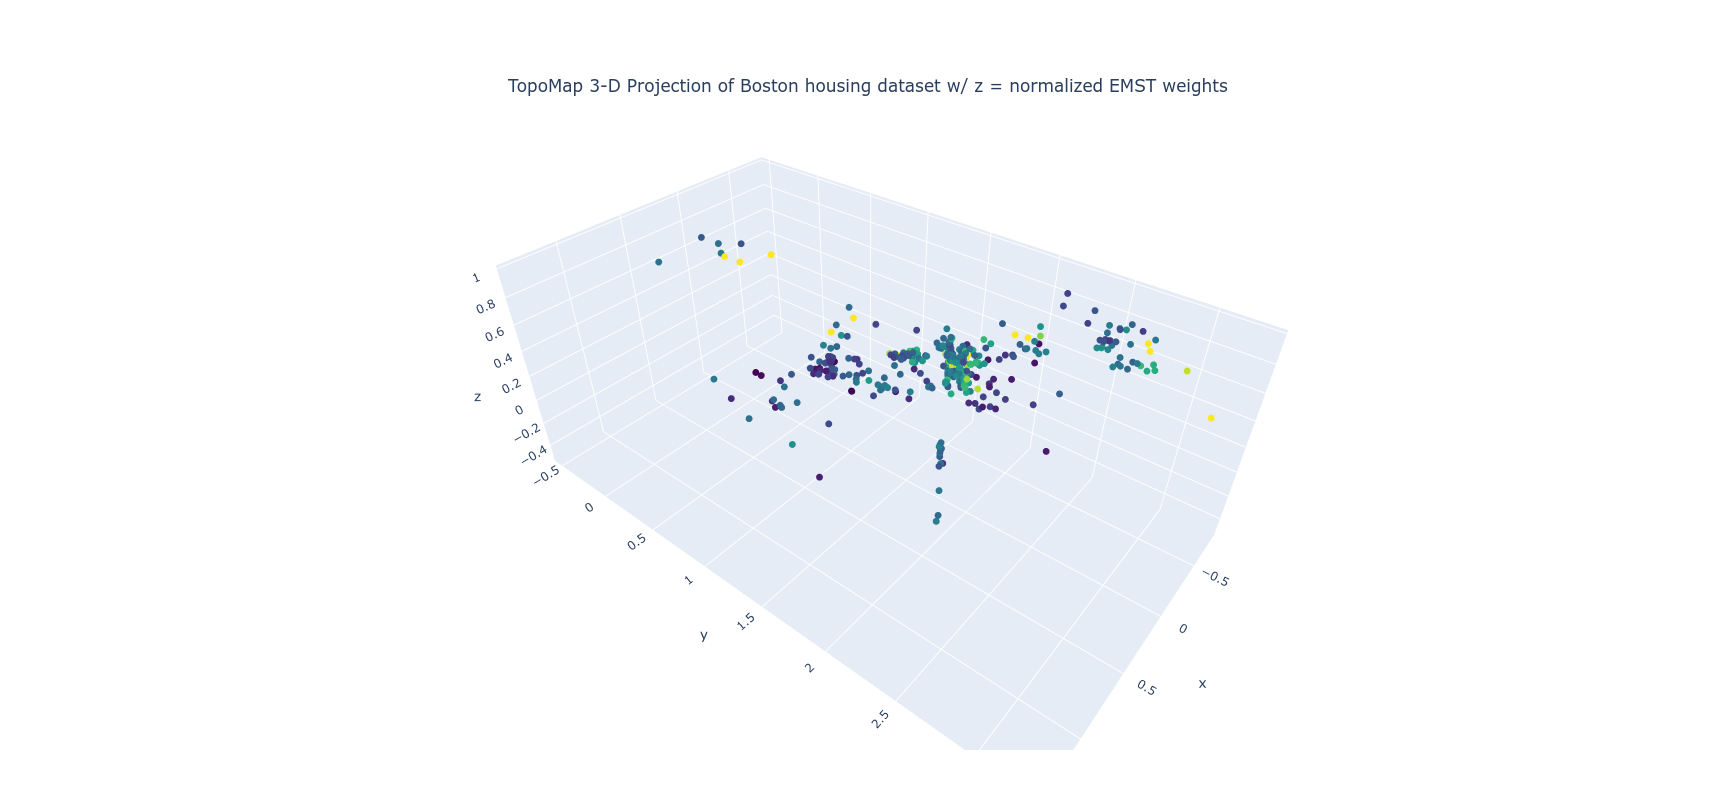

In [16]:
@time tm = TopoMap.project(bh_features; dimensions=3);
tm_df = DataFrame(tm, :auto)
tm_df[!, :targets] = vec(bh_targets)
trace = scatter3d(tm_df;x=:x1,y=:x2,z=:x3, text=:targets, mode="markers",
                        marker=attr(color=:targets, colorscale="Viridis",size=4, symbol="circle"))
plot(trace,Layout(colorbar=true,width=800, height=800,title=attr(
        text= "TopoMap 3-D Projection of Boston housing dataset w/ z = normalized EMST weights",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")))

In [17]:
@time tm = TopoMap.project(iris_features; dimensions=3);

Computing EMST...
--> ngroups: 150
--> ngroups: 40
--> ngroups: 9
--> ngroups: 3
Placing points...
  0.162545 seconds (1.84 M allocations: 115.896 MiB, 11.74% gc time)


scatter3d with fields group, marker, mode, type, x, y, and z


## Something more realistic: FICO dataset

In [19]:
file_name = "../data/cleaned_fico_data.csv"
fico_df = DataFrame(CSV.File(file_name))
X = Matrix{Float64}(fico_df[:,2:24])
X = copy(normalize(copy(copy(X')'))')
Y = fico_df[:,1];
summary(X)

"23×9871 Matrix{Float64}"

In [20]:
@time tm_fico_2d = TopoMap.project(X; dimensions=2); # ~21 minutes if data isn't normalized, 40 minutes if normalized

Computing EMST...
--> ngroups: 9871
--> ngroups: 1901
--> ngroups: 251
--> ngroups: 28
--> ngroups: 6
--> ngroups: 2
Placing points...
2413.379075 seconds (33.74 G allocations: 2.073 TiB, 12.24% gc time)


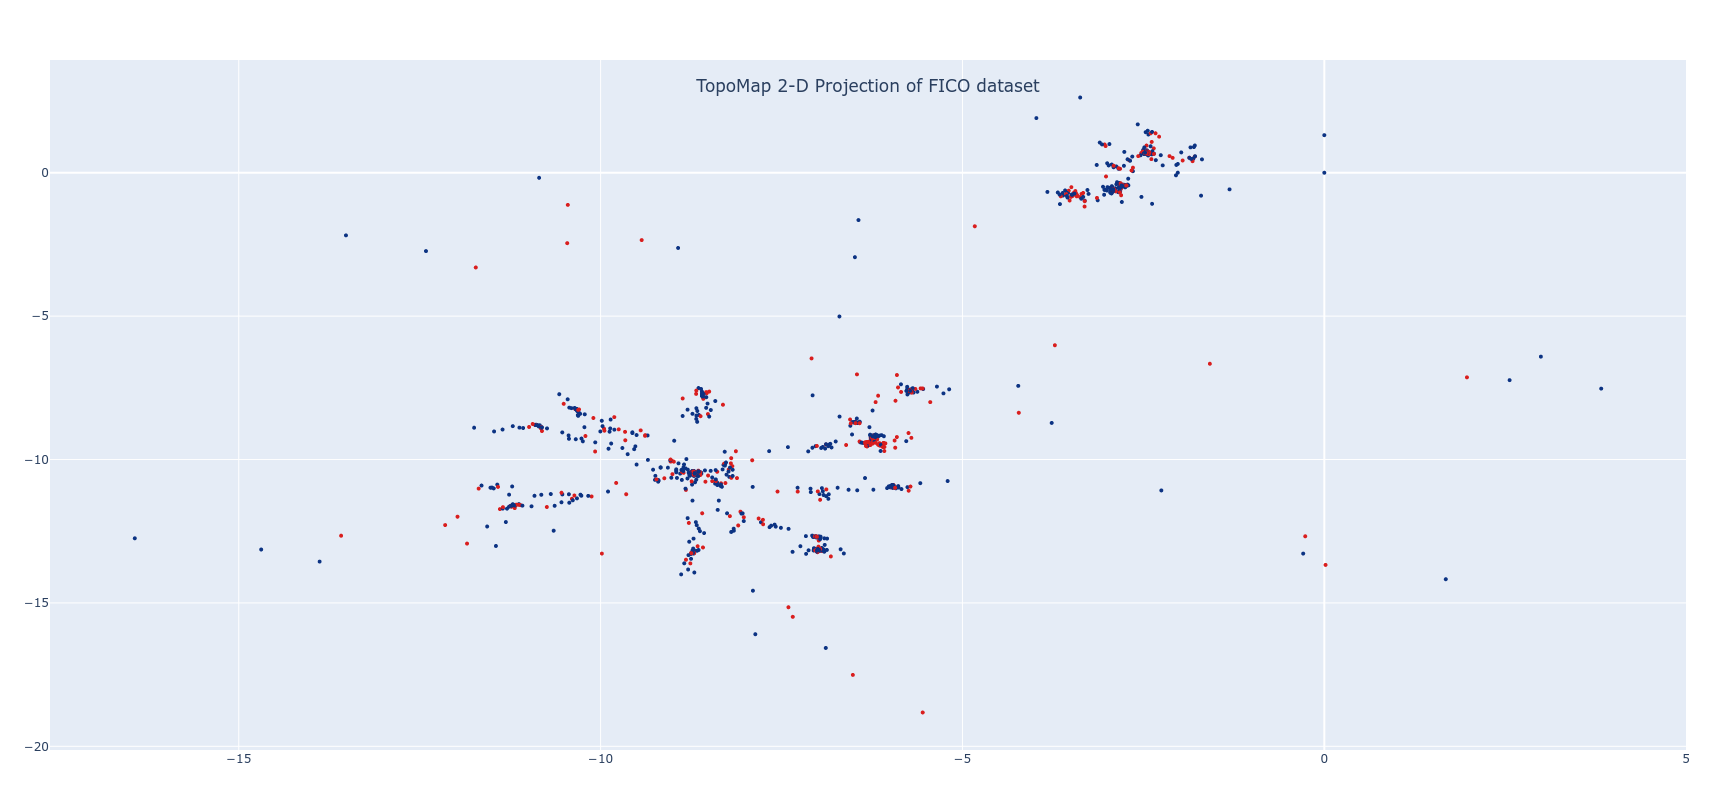

In [21]:
trace = scatter(;x=tm_fico_2d[:,1],y=tm_fico_2d[:,2], mode="markers",
                        marker=attr(color=Y, colorscale="Portland",size=4, symbol="circle"))
plot(trace, Layout(showgrid=false,width=800, height=800,title=attr(
        text= "TopoMap 2-D Projection of FICO dataset",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")))

In [22]:
@time tm_fico = TopoMap.project(X; dimensions=3); # This takes 19 minutes if data is not normalized

Computing EMST...
--> ngroups: 9871
--> ngroups: 1901
--> ngroups: 251
--> ngroups: 28
--> ngroups: 6
--> ngroups: 2
Placing points...
2662.889799 seconds (33.74 G allocations: 2.073 TiB, 14.65% gc time)


In [23]:
z_mod_fico = 0:0.01:1
mp = @manipulate for z_m in z_mod_fico
    trace = scatter3d(;x=tm_fico[:,1],y=tm_fico[:,2], z=(z_m .* tm_fico[:,3]), mode="markers",
                        marker=attr(color=Y, colorscale="Portland", size=2, symbol="circle"))
plot(trace,
    Layout(
        width=800, 
        height=800,
                scene=attr(

        zaxis=attr(
            range=[0,1]
        ),
    ),
        title=attr(
        text= "TopoMap 3-D Projection of FICO dataset w/ z = normalized EMST weights",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")
    ))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["z_m"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/cprimel/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/cprimel/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/cprimel/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/home/cprimel/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/home/cprimel/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007faa59f9d5a0, Task (runnable) @0x00007faa59f9d5a0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\"0.28\",\"0.29\",\"

In [18]:
z_mod = 0:0.01:1
mp = @manipulate for z_m in z_mod
    trace = scatter3d(;x=tm[:,1],y=tm[:,2], z=(z_m .* tm[:,3]), mode="markers",group = iris_labels,
                        marker=attr(color=color_map, colorscale="Viridis", size=8, symbol="circle"))
plot(trace,
    Layout(
        width=800, 
        height=800,
                scene=attr(

        zaxis=attr(
            range=[0,1]
        ),
    ),
        title=attr(
        text= "TopoMap 3-D Projection of Iris dataset w/ z = normalized EMST weights",
        y=0.9,
        x=0.5,
        xanchor= "center",
        yanchor= "top")
    ))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["z_m"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/cprimel/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/cprimel/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/cprimel/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/home/cprimel/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/home/cprimel/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007faa5aa52850, Task (runnable) @0x00007faa5aa52850), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\"0.28\",\"0.29\",\"